In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [4]:
data = pd.read_csv('directions.csv')
data.head()

,x_diff,y_diff,direction
0,165,90,2
1,15,90,2
2,0,-35,1
3,-180,-140,0
4,-30,-140,0


Text(0, 0.5, 'y difference')

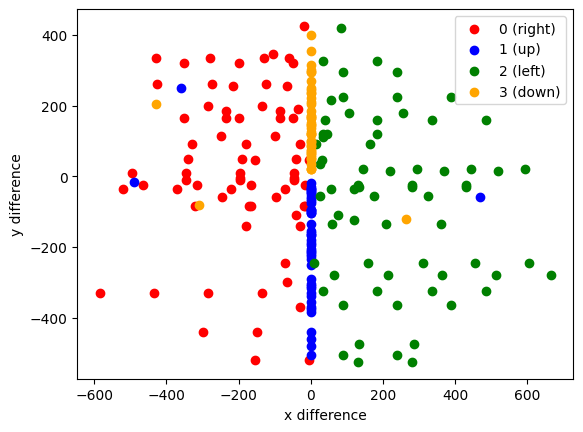

In [5]:
import matplotlib
colors = ['red', 'blue', 'green', 'orange']
labels = ['0 (right)', '1 (up)', '2 (left)', '3 (down)']
# plt.scatter(data['x_diff'], data['y_diff'], c=data['direction'], cmap=matplotlib.colors.ListedColormap(colors))
for i in range(4):
    plt.scatter(data[data['direction']==i]['x_diff'], data[data['direction']==i]['y_diff'], c=colors[i], label=labels[i])
plt.legend()
plt.xlabel('x difference')
plt.ylabel('y difference')

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, 'tanh', input_shape=(2,)),
    tf.keras.layers.Dense(8, 'tanh'),
    tf.keras.layers.Dense(4, 'softmax')
])
model.compile(tf.keras.optimizers.Adam(), 'sparse_categorical_crossentropy', metrics=['accuracy'])
output = model.fit(data[['x_diff', 'y_diff']], data['direction'], epochs=200, validation_split=.25)

Epoch 1/200
6/6 [==============================] - 1s 48ms/step - loss: 1.5729 - accuracy: 0.2191 - val_loss: 1.3825 - val_accuracy: 0.2500
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 1.4741 - accuracy: 0.2191 - val_loss: 1.2448 - val_accuracy: 0.2500
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 1.3742 - accuracy: 0.2191 - val_loss: 1.1570 - val_accuracy: 0.2500
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 1.3000 - accuracy: 0.2303 - val_loss: 1.0943 - val_accuracy: 0.2833
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 1.2389 - accuracy: 0.2360 - val_loss: 1.0301 - val_accuracy: 0.2833
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 1.1846 - accuracy: 0.3146 - val_loss: 0.9766 - val_accuracy: 0.6667
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 1.1332 - accuracy: 0.5787 - val_loss: 0.9293 - val_accuracy: 0.7833
Epoch 8/200
6/6 [===

Text(0, 0.5, 'accuracy')

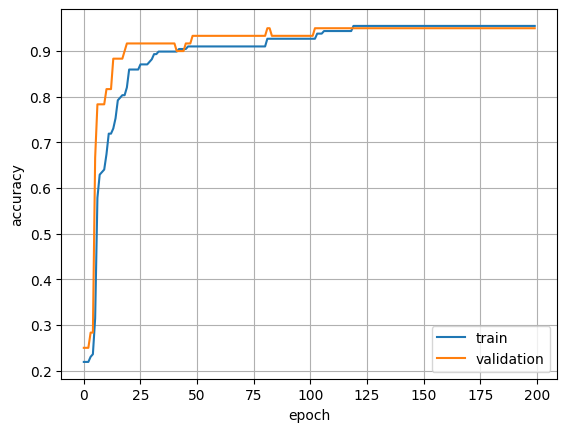

In [21]:
plt.plot(output.history['accuracy'], label='train')
plt.plot(output.history['val_accuracy'], label='validation')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')